# Implementing a neural network with a single hidden layer

In this assignment you will learn to implement a neural network with a single hidden layer and apply it on a toy dataset. You will be using this neural networks to perform binary classification. In a binary classification problem, each input belongs to one of two classes, say 0 or 1, and the goal is to predict the correct class of each input. This assignment will be a stepping stone for more complex neural networks with multiple hidden layers. This notebook is based on the material from: <br/>
http://cs231n.github.io/neural-networks-case-study/ <br/>
https://cs.stanford.edu/people/karpathy/cs231nfiles/minimal_net.html


#### Instructions
-  Do not use any additional libraries other than what is already specified below
-  Do not use loops in your code, use numpy for vectorized implementation
-  Do not edit "Expected output" markdown cells


### 1. Import Libraries
For this assignment we will import the following libraries:

In [114]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from utils import utils
from utils.utils import sigmoid

### 2. Creating the data
Let us create the same simple dataset that we used for logistic regression assignment and visualise it.

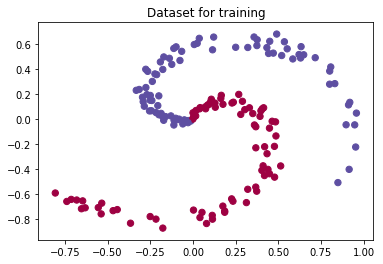

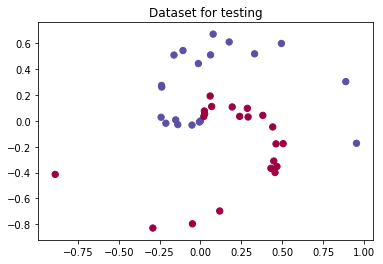

In [115]:
X_train,yhat_train,X_test,yhat_test = utils.create_simple_dataset()


###  3. Data representation and parameters
Assuming there are $m$ training samples, the pair $(x^{(i)}, \hat{y}^{(i)})$ denote the $i^{th}$ training sample. Each training sample consists of $n$ features denoted by $x^{(i)}$ and the correponding class label $\hat{y}^{(i)}$. For this dataset, we use two features, hence $n=2$. For each training sample, the features $x^{(i)}$ can be thought of as an $n\times1$ column vector. 

For vectorized operations, we arrange the column vectors corresponding to all the features of the training samples in the form of a $n \times m$ matrix $X$ and the ground truth class labels as a $1 \times m$ row vector $\hat{y}$. These are same as the conventions we followed in the logistic regression assignment.

For this exercise, we will create a simple neural network having only one hidden layer with five neurons as shown below. The input layer has two nodes since the number of features we use is $n=2$. The output layer has a single neuron since this neural network is used for binary classification. Let $n_x$, $n_h$, and $n_y$ denote the number of nodes in the input layer, the hidden layer, and the output layer respectively. In this exercise, $n_x = 2$, $n_h = 5$ and $n_y = 1$.
<img src="nn.png" style="width:600px;height:300px;">

Each edge of the neural network has an associated weight. The weights corresponding to the edges between the input layer and the hidden layer can be represented as a $n_h \times n_x$ matrix $W_1$. Similarly, a $n_y \times n_h$ matrix $W_2$ represents the weights corresponding to the edges between the hidden layer and the output layer. The bias parameters for the nodes of the hidden layer and output layer are denoted by $b_1$ and $b_2$ respectively.

### 4. Create Weight and Bias variables
Use the cell below to create the weight parameters $W_1$ and $W_2$ and initialise them with small random values. Similarly create bias parameters $b_1$ and $b_2$ and initialise them with zeros.


In [116]:
def create_params(n_x, n_h, n_y):
    np.random.seed(2)
    param_dict = {}
    param_dict['W1'] = np.random.randn(n_h, n_x) * 0.01
    param_dict['b1'] = np.zeros((n_h,1))
    param_dict['W2'] = np.random.randn(n_y, n_h) * 0.01
    param_dict['b2'] = np.zeros((n_y,1))
    return param_dict

In [117]:
param_dict = create_params(2,5,1)

### DONT CHANGE TEST PARAMETERS

In [118]:
X = X_train[:,:3]
yhat = yhat_train[:,:3]
print X
print yhat

[[ 0.16636464  0.84992846 -0.22278713]
 [ 0.18997844 -0.50746588  0.36103674]]
[[0 1 1]]


### 5. Implement forward propagation
Using the parameters $W_1$, $W_2$, $b_1$, and $b_2$ you have to implement the forward propgation and calculate the values for:<br/>
$Z^{[1]} = W_1 \cdot X + b_1$<br/>
$A^{[1]} = tanh(Z^{[1]})$<br/>
$Z^{[2]} = W_2 \cdot A^{[1]} + b_2$<br/>
$A^{[2]} = sigmoid(Z^{[2]})$ <br/>
$L = -\frac{1}{m} (\hat Y log (A^{[2]}) + (1-\hat Y)log(1-A^{[2]}))$


In [119]:
def forward_propagate(X,yhat, param_dict):
    cached_data = {}
    cached_data['Z1']  = np.dot(param_dict['W1'],X)+param_dict['b1']
    cached_data['A1'] = np.tanh(cached_data['Z1'])
    cached_data['Z2'] = np.dot(param_dict['W2'],cached_data['A1'])+param_dict['b2']
    cached_data['A2'] = sigmoid(cached_data['Z2'])
    # compute the loss: average cross-entropy loss and regularization
    loss = -np.mean(yhat*np.log(cached_data['A2']) + (1.0-yhat)*np.log(1.0-cached_data['A2']))
    return loss, cached_data

**Let us test if the forward propagation is implemented correctly**

In [120]:
loss, cached_data = forward_propagate(X,yhat, param_dict)
print ("Actiavtion 1:")
print (cached_data['A1'])
print ("Activation 2:")
print (cached_data['A2'])
print "Loss:"
print loss


Actiavtion 1:
[[-0.00080023 -0.0032566   0.00072534]
 [-0.00043771 -0.02647377  0.01068074]
 [-0.00458275 -0.0109709   0.00095653]
 [-0.00152916  0.01059315 -0.00561624]
 [-0.00348696 -0.00437891 -0.00092487]]
Activation 2:
[[ 0.49999549  0.49980716  0.50007676]]
Loss:
0.693221593345


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;"> <th>Expected output:</th></tr></thead> <tbody>
<tr style="text-align: left;"><td>Activation 1:<br/></td></tr>
<tr style="text-align: left;"><td>
[[-0.00080023 -0.0032566   0.00072534]<br/>
[-0.00043771 -0.02647377  0.01068074]<br/>
[-0.00458275 -0.0109709   0.00095653]<br/>
[-0.00152916  0.01059315 -0.00561624]<br/>
[-0.00348696 -0.00437891 -0.00092487]]<br/>
<td/></tr>
<tr style="text-align: left;"><td>Activation 2:<br/></td></tr>
<tr style="text-align: left;"><td>
[[ 0.49999549  0.49980716  0.50007676]]
<td/></tr>
<tr style="text-align: left;"><td>Loss:<br/></td></tr>
<tr style="text-align: left;"><td>0.693221593345<br/></td></tr>
</tbody>  </table>

### 6. Implement backward propagation
Now comes the more difficult backward propagation where you have to compute the derivative with respect to the loss function. You need to implement the following in a vectorised manner:
\begin{align}
dZ^{[2]}  &= A^{[2]} - \hat Y\\
dW^{[2]}  &= \frac{1}{m} dZ^{[2]} \cdot {A^{[1]}}^{T}\\
db^{[2]}  &= \frac{1}{m} \sum dZ^{[2]}\\
dZ^{[1]}  &= \frac{1}{m} W_2^T \cdot dZ^{[2]} * ( 1 - {A^{[1]}}^2)\\
dW^{[1]}  &= \frac{1}{m} dZ^{[1]} \cdot  X^T\\
db^{[1]}  &= \frac{1}{m} \sum dZ^{[1]}\\
\end{align}


In [121]:
def backward_propagate(X,yhat, param_dict, cached_data):
    m = X.shape[1]
    dZ2 = (cached_data['A2'] - yhat)
    dW2 = 1.0/m*np.dot(dZ2, cached_data['A1'].T)
    db2 = 1.0/m*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(param_dict['W2'].T, dZ2) * (1 - np.power(cached_data['A1'],2))
    dW1 = 1.0/m*np.dot(dZ1,X.T)
    db1 = 1.0/m*np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2


**Let us test if the backward propagation is implemented correctly**

In [122]:
dW1, db1, dW2, db2 = backward_propagate(X,yhat, param_dict, cached_data)

# assertions on size of dws and dbs
print "dW1:"
print(dW1)
print "db1:"
print(db1)

print "dW2:"
print(dW2)
print "db2:"
print(db2)

dW1:
[[ -4.23821293e-04   3.09413235e-04]
 [ -1.75953603e-03   1.28494442e-03]
 [ -3.19189772e-05   2.33030631e-05]
 [  8.59036640e-04  -6.27176650e-04]
 [ -4.14289772e-04   3.02452398e-04]]
db1:
[[ -9.19302116e-04]
 [ -3.81815459e-03]
 [ -6.92420754e-05]
 [  1.86339492e-03]
 [ -8.98640161e-04]]
dW2:
[[ 0.00028873  0.00256119  0.00090601 -0.00108517  0.00030307]]
db2:
[[-0.16670687]]


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;"> <th>Expected output:</th></tr></thead> <tbody>
<tr style="text-align: left;"><td>dW1:<br/></td></tr>
<tr style="text-align: left;"><td>
[[ -4.23821293e-04   3.09413235e-04]<br/>
 [ -1.75953603e-03   1.28494442e-03]<br/>
 [ -3.19189772e-05   2.33030631e-05]<br/>
 [  8.59036640e-04  -6.27176650e-04]<br/>
 [ -4.14289772e-04   3.02452398e-04]]<br/>
<td/></tr>
<tr style="text-align: left;"><td>db1:<br/></td></tr>
<tr style="text-align: left;"><td>
[[ -9.19302116e-04]<br/>
 [ -3.81815459e-03]<br/>
 [ -6.92420754e-05]<br/>
 [  1.86339492e-03]<br/>
 [ -8.98640161e-04]]<br/>
<td/></tr>
<tr style="text-align: left;"><td>dW2:<br/></td></tr>
<tr style="text-align: left;"><td>
[[ 0.00028873  0.00256119  0.00090601 -0.00108517  0.00030307]]<br/>
<td/></tr>
<tr style="text-align: left;"><td>db2:<br/></td></tr>
<tr style="text-align: left;"><td>[[-0.16670687]]<br/></td></tr>
</tbody>  </table>


### 7. Training the network
With the forward and backward propagation implemented, we can now implement the fit function to train the network and  determine the values for the parameters. This is done using gradient descent rule: 
$ \theta = \theta - \alpha \cdot \frac{\partial L}{\partial \theta} $
where $\theta$ is a parameter that needs to be updated, $\frac{\partial L}{\partial \theta}$ is the gradient of  loss function $L$ with respect to $\theta$ and $\alpha$ is the learning rate.

In [123]:
def fit(X,yhat, alpha = 0.5, epochs = 10000, print_cost = False):
    n_x = X.shape[0]
    param_dict = create_params(n_x,5,1)
    for i in range(epochs):
        
        loss, cached_data = forward_propagate(X,yhat, param_dict)
        dw1,db1, dw2, db2 = backward_propagate(X,yhat, param_dict, cached_data)
        
        param_dict['W1'] -= alpha*dw1
        param_dict['b1'] -= alpha*db1
        param_dict['W2'] -= alpha*dw2
        param_dict['b2'] -= alpha*db2
        if i % 1000 == 0 and print_cost == True:
            print(loss)
    return param_dict
        

In [124]:
param_dict = fit(X_train,yhat_train, epochs = 10000, print_cost = True)

0.693091379275
0.0694891717794
0.0360562903116
0.0278517255979
0.0236036145033
0.0208583558305
0.018882674365
0.017368419956
0.0161582159196
0.0151611938343


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;"> <th>Expected output:</th></tr></thead> <tbody>

<tr style="text-align: left;"><td>
0.693091379275<br/>
0.0694891717794<br/>
0.0360562903116<br/>
0.0278517255979<br/>
0.0236036145033<br/>
0.0208583558305<br/>
0.018882674365<br/>
0.017368419956<br/>
0.0161582159196<br/>
0.0151611938343<br/>
<td/></tr>
</tbody></table>

### Evaluate the loss
Make sure the loss is drecreasing 
To make the model learn faster change the alpha(learning rate ) to a higher value, but make sure you are not getting nans, then reduce the alpha as we may be lossing gardients. Sigmoid function has this problem where it will lose the gradients to exploding and vanishing gardient problems which happens when the input to the sigmoid gets too big or too small.

### Evaluate model 


In [67]:
def predict(X,param_dict):
    z1  = np.dot(param_dict['W1'],X)+param_dict['b1']
    a1 = np.tanh(z1)
    z2 = np.dot(param_dict['W2'],a1)+param_dict['b2']
    a2 = sigmoid(z2)
    return a2 >= 0.5

In [68]:
# evaluate training set accuracy
predicted_class = predict(X_test,param_dict)

print ('training accuracy: %.2f' % (np.mean(predicted_class == yhat_test)))

training accuracy: 0.95


### Plot the decision plane learned by the model


In [69]:
X.shape

(2, 3)

In [70]:
# plot the resulting classifier
h = 0.02
X = X_train
y = yhat_train
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
# Z = np.argmax(Z, axis=1)
# z1  = np.dot(param_dict['w1'],np.c_[xx.ravel(), yy.ravel()].T)
# a1 = np.tanh(z1)+param_dict['b1']
# z2 = np.dot(param_dict['w2'],a1)
# a2 = sigmoid(z2)+param_dict['b2']
a2 = predict(np.c_[xx.ravel(), yy.ravel()].T, param_dict)
Z = a2 >= 0.5
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X.T[:, 0], X.T[:, 1], c=y[0,:], s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

(-1.5074658789387572, 1.8325341210612458)

We  can see that our model fits the data by seperating the data plane to two

In [71]:
def plot():
    pass

### Minimum accuracy
Since this is a evenly distributed dataset with o=only two classes we must atleast have an accuracy of 50 % which we can get with random predictions.

### How to improve
We can add more neurons, layer and regularization to get more accuarcy

### optional make it a class
We can add all these functions we created to a class and we will have the ability to define a  model and call . fit to train the model like we do in  scikit learn

In [72]:
class simplennmodel():
    def __init__ (self,input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.create_params()
        
    def create_params(self):
        self.w1 = np.random.randn(self.hidden_dim, self.input_dim) * 0.01
        self.b1 = np.zeros((self.hidden_dim,1))
        self.w2 = np.random.randn(self.output_dim, self.hidden_dim) * 0.01
        self.b2 = np.zeros((self.output_dim,1))
        
    def forward_propagate(self,X,yhat): 
        self.z1  = np.dot(self.w1,X)
        self.a1 = np.tanh(self.z1)+self.b1
        self.z2 = np.dot(self.w2,self.a1)
        self.a2 = sigmoid(self.z2)+self.b2
        self.loss = -np.mean(yhat*np.log(self.a2) + (1.0-yhat)*np.log(1.0-self.a2))
    
    def backward_propagate(self,X,yhat):
        m = X.shape[1]
        dz2 = (self.a2 - yhat)
        dw2 = 1.0/m*np.dot(dz2, self.a1.T)
        db2 = 1.0/m*np.sum(dz2, axis=1, keepdims=True)
        dz1 = np.dot(self.w2.T, dz2) * (1 - np.power(self.a1,2))
        dw1 = 1.0/m*np.dot(dz1,X.T)
        db1 = 1.0/m*np.sum(dz1, axis=1, keepdims=True)
        return dw1, db1, dw2, db2
    
    def fit(self,X,yhat,alpha = 0.005,niter = 10000):
        n_x = X.shape[0]
        alpha = 0.005
        for i in range(niter):
            self.forward_propagate(X,yhat)
            dw1,db1, dw2, db2 = self.backward_propagate(X,yhat)
            self.w1 -= alpha*dw1
            self.b1 -= alpha*db1
            self.w2 -= alpha*dw2
            self.b2 -= alpha*db2
            if i % 1000 == 0:
                print(self.loss)
                
    def predict(self,X):
        self.z1  = np.dot(self.w1,np.c_[xx.ravel(), yy.ravel()].T)
        self.a1 = np.tanh(self.z1)+self.b1
        self.z2 = np.dot(self.w2,self.a1)
        self.a2 = sigmoid(self.z2)+self.b2
        self.predicted_class = self.a2 >= 0.5
#         print ('training accuracy: %.2f' % (np.mean(predicted_class == y)*100))
#         return self.predicted _class
        
    
    
    

In [73]:
# diamentions of each layer
n_x = X.shape[0]
n_h = 10
n_o = 1
# initialize the model
model = simplennmodel(n_x, n_h, n_o)

In [74]:
# training
model.fit(X, y)

0.693119050435
0.692748158612
0.69166494559
0.687210132727
0.67007227819
0.619020498676
0.535289192949
0.469854312864
0.436673770066
0.421187345312


In [75]:
# predicted_result, accuracy = model.predict(X, yhat)
# model.predict(X, yhat)
model.predict(X)
predicted_class = model.a2 >= 0.5
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.00


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """


### Desicion plane visualization

In [76]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
model.predict(np.c_[xx.ravel(), yy.ravel()].T)
Z = model.predicted_class >= 0.5
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X.T[:, 0], X.T[:, 1], c=y[0,:], s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

(-1.5074658789387572, 1.8325341210612458)